In [ ]:
import sys
#sys.path.insert(0,'/home/amullen/RCTM')
import os
#import RCTM.input_data.utils as utils # replace
#from google.cloud import storage
from datetime import datetime as dt
import pandas as pd
import time
#import rioxarray as rxr
import xarray as xr
#from rasterio.enums import Resampling
#import tempfile
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
bucket_name = 'sundai-satellite-data'
site = 'US-A32'

modis_path = f'gs://{bucket_name}/modis/modis_{site}.nc'
landsat_path = f'gs://{bucket_name}/landsat/landsat_{site}.nc'
embeddings_path = f'gs://{bucket_name}/embeddings/alpha_earth_{site}.nc'

In [8]:
modis = utils.load_dataset(modis_path)
landsat = utils.load_dataset(landsat_path)
embeddings = utils.load_dataset(embeddings_path)

In [43]:
landsat

<xarray.Dataset> Size: 301MB
Dimensions:          (time: 652, y: 97, x: 108)
Coordinates:
  * y                (y) float64 776B 4.077e+06 4.077e+06 ... 4.074e+06
  * x                (x) float64 864B 6.037e+05 6.037e+05 ... 6.069e+05
    spatial_ref      int64 8B 0
  * time             (time) datetime64[ns] 5kB 2002-01-12 ... 2024-09-29
Data variables: (12/16)
    blue             (time, y, x) uint16 14MB 599 501 501 469 ... 517 541 550
    green            (time, y, x) uint16 14MB 921 853 786 786 ... 745 781 780
    red              (time, y, x) uint16 14MB 1022 885 831 776 ... 965 950 950
    nir08            (time, y, x) uint16 14MB 4028 4364 4432 ... 1974 2053 2062
    swir16           (time, y, x) uint16 14MB 3095 2858 2772 ... 3023 3028 2989
    swir22           (time, y, x) uint16 14MB 2115 1869 1746 ... 2342 2305 2237
    ...               ...
    cloud_cover      (time) float64 5kB 0.0 4.0 39.0 0.5 ... 0.15 10.48 0.075
    VZA              (time, y, x) float32 27MB 1.405 1.405 1.405 ... 1.83 1.83
    VAA              (time, y, x) float32 27MB 105.7 105.7 105.7 ... 128.6 128.6
    SZA              (time, y, x) float32 27MB 6.424e+03 6.424e+03 ... 4.318e+03
    SAA              (time, y, x) float32 27MB 1.507e+04 1.507e+04 ... 1.524e+04
    solar_zenith     (time) float64 5kB 64.14 62.6 60.96 ... 37.97 39.91 43.07

In [11]:
modis

<xarray.Dataset> Size: 3GB
Dimensions:                                   (time: 7992, y: 97, x: 108)
Coordinates:
  * time                                      (time) datetime64[ns] 64kB 2001...
  * y                                         (y) float64 776B 4.077e+06 ... ...
  * x                                         (x) float64 864B 6.037e+05 ... ...
    spatial_ref                               int32 4B 32614
Data variables:
    blue                                      (time, y, x) float32 335MB 345....
    green                                     (time, y, x) float32 335MB 761....
    red                                       (time, y, x) float32 335MB 702....
    nir08                                     (time, y, x) float32 335MB 3.81...
    swir16                                    (time, y, x) float32 335MB 2.70...
    swir22                                    (time, y, x) float32 335MB 1.36...
    BRDF_Albedo_Band_Mandatory_Quality_Band3  (time, y, x) float64 670MB nan ...

In [48]:
embeddings

<xarray.Dataset> Size: 43MB
Dimensions:      (band: 64, x: 108, y: 97, time: 8)
Coordinates:
  * band         (band) int64 512B 1 2 3 4 5 6 7 8 9 ... 57 58 59 60 61 62 63 64
    spatial_ref  int64 8B 0
  * x            (x) float64 864B 6.037e+05 6.037e+05 ... 6.068e+05 6.069e+05
  * y            (y) float64 776B 4.077e+06 4.077e+06 ... 4.074e+06 4.074e+06
  * time         (time) datetime64[ns] 64B 2017-01-01 2018-01-01 ... 2024-01-01
Data variables:
    embedding    (time, band, y, x) float64 43MB nan nan nan nan ... nan nan nan

Text(0.5, 1.0, 'AlphaEarth (b1)')

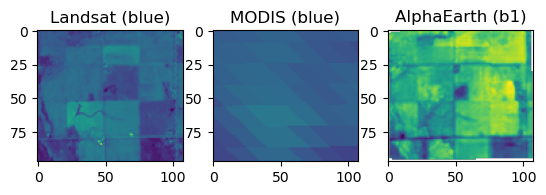

In [46]:
rs_date = pd.to_datetime('2024-09-13')
ae_date = pd.to_datetime('2024-01-01')
fig, axes = plt.subplots(1,3)

landsat_sample = landsat.blue.sel(time=rs_date)
modis_sample = modis.blue.sel(time=rs_date)
embeddings_sample = embeddings.sel(time=ae_date, band=1).embedding

axes[0].imshow(landsat_sample)
axes[1].imshow(modis_sample, vmin = landsat_sample.min(), vmax=landsat_sample.max())
axes[2].imshow(embeddings_sample)

axes[0].set_title('Landsat (blue)')
axes[1].set_title('MODIS (blue)')
axes[2].set_title('AlphaEarth (b1)')

<Axes: title={'center': 'Landsat, MODIS pixel values'}, ylabel='Count'>

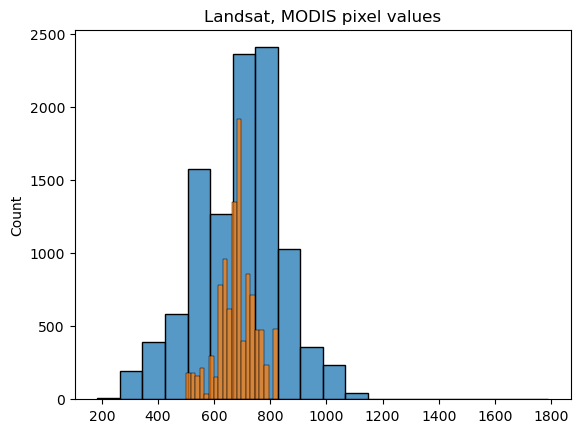

In [47]:
plt.title('Landsat, MODIS pixel values')
sns.histplot(landsat_sample.values.flatten(), bins=20, label='Landsat')
sns.histplot(modis_sample.values.flatten(), bins=20, label='MODIS')

<Axes: ylabel='Count'>

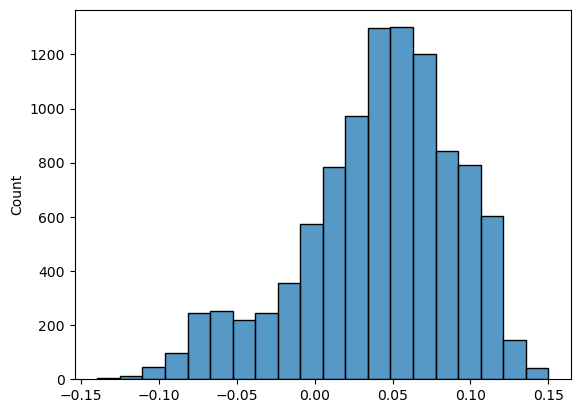

In [49]:
sns.histplot(embeddings_sample.values.flatten(), bins=20, label='Landsat')